<a href="https://colab.research.google.com/github/SujitbMusale/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.


    Content

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

# Data Importing and Data Claeaning

In [263]:
#Importing Libararies
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [264]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [265]:
# loading the user file
Users=pd.read_csv('/content/drive/MyDrive/almabetter/capston project/Unsupervised Machine Learning/Users.csv')

In [266]:
# loading the Books File
Books=pd.read_csv('/content/drive/MyDrive/almabetter/capston project/Unsupervised Machine Learning/Books.csv')

In [267]:
# loading the Rating file
Ratings=pd.read_csv('/content/drive/MyDrive/almabetter/capston project/Unsupervised Machine Learning/Ratings.csv')

In [268]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [269]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [270]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [271]:
#lets check the dimension of sheet
Users.shape

(278858, 3)

In [272]:
Books.shape

(271360, 8)

In [273]:
Ratings.shape

(1149780, 3)

# Data Cleaning- User Dataset.

In [274]:
# lets take user data
# chcek th missing value
Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

So, from above we can say that the age is having large number of value as a missing value.

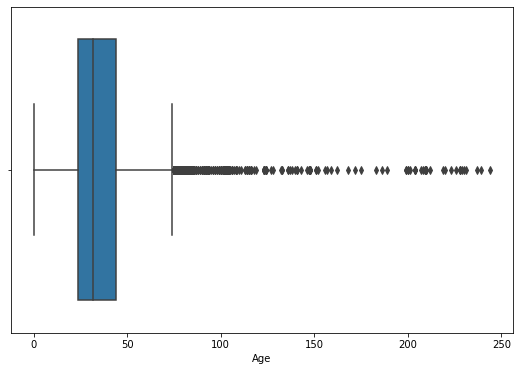

In [275]:
# lets check the outliers from the age colum
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()   
sns.boxplot(x=Users['Age'])

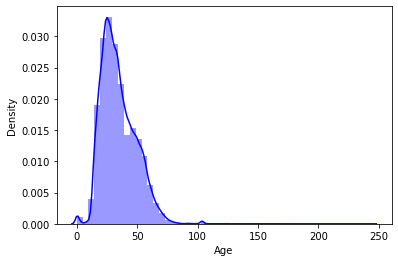

In [276]:
# lets chcek the distribution of'Age'.
sns.distplot(Users['Age'],kde=True,color='blue')

The data is showing some points are above the 100 so either we can remove data beyound upper quartile and we can obser ther are age numbers are from 100 to 250 whic seems to be ouliers from distribution graph.
and also upto 5 year people will not read a book.

In [277]:
#replacing the outliers in 'Age' with NaN value
Users.loc[(Users['Age']>100)|(Users['Age']<5),'Age']=np.nan

In [278]:
#Displaying the current number of missing values in  'Age' column
print('The number of missing values is ',Users['Age'].isnull().sum())

The number of missing values is  112010


In [279]:
Users['Age'].describe()

count    166848.000000
mean         34.746638
std          13.633051
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         100.000000
Name: Age, dtype: float64

as from disctibution plot we can see that data is positively skweed we can fill data with median value

In [280]:
# =Users['Age'].fillna(Users.groupby('User-ID')['Age'].transform('median'))
Users['Age'].fillna(Users.Age.median(),inplace=True)

In [281]:
Users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

As from abow there is no null value resent in Users data set.

In [282]:
# lets check the duplicate value in Users data sat.
Users[Users['User-ID'].duplicated()].sum()

User-ID     0.0
Location    0.0
Age         0.0
dtype: float64

There is no any duplicate value in user dataset.

In [283]:
# lets create the age group to have a better study.
def Age_group(age):
  ''' 
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [284]:
# Use lambda function
Users['Age_group']=Users['Age'].apply(lambda x: Age_group(x))

In [285]:
# now lets work on location columns
# lets chcek the number of unique value
print(Users['Location'].nunique())
Users.Location.unique()


57339


array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [286]:
#extracting the country names.
for i in Users:
    Users['Country']=Users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')


In [287]:
Users.Country.nunique()

529

In [288]:
# convert the data into string type.
Users['Country']=Users['Country'].astype('str')

Now we can see that the country name are 529 which are considerable.

In [289]:
#drop location column
Users.drop('Location',axis=1,inplace=True)

In [290]:
# lets check the unique data
a=list(Users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

lets correct the miss- spelled and numeric data from unique country name.

In [291]:
#correcting the mispelled country names
Users.loc[Users['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
Users.loc[Users['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america',
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
Users.loc[Users['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
Users.loc[Users['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
Users.loc[Users['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
Users.loc[Users['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
Users.loc[Users['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
Users['Country'].replace(['the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'])

0              usa
1              usa
2           russia
3         portugal
4               uk
            ...   
278853         usa
278854          uk
278855      canada
278856         usa
278857     ireland
Name: Country, Length: 278858, dtype: object

In [292]:
Users['Country'].nunique()

483

Here the total after rmoving miss-spelled and numeric data now we got 483 country name only.

# Data Cleaning- Books Dataset.

In [293]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [294]:
# Check the shape
Books.shape

(271360, 8)

In [295]:
# check the null values
Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

From above we can see that the total row are 271360 which is too large and we are having null value in Publisher and Image-URL-L 2 and 3 respectively.
inshort its too low so we can easily drip that column.

In [296]:
# drop the nan rows
Books=Books.dropna()

In [297]:
#insepcting the values in year of publication
Books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We can see that some of data is in str and some in numeric form so we will convert all data in to numeric form.

In [298]:
Books['Year-Of-Publication']=pd.to_numeric(Books['Year-Of-Publication'], errors='coerce')

The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting invalid years as NaN

Reference of the fact: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

We wii replace the value with median

In [299]:
Books.loc[(Books['Year-Of-Publication'] > 2006)|(Books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN
#replacing NaNs with median value of Year-Of-Publication
Books['Year-Of-Publication'].fillna(round(Books['Year-Of-Publication'].median()), inplace=True)

Also we will drop the last three URL columns as its dont have any important in analysis

In [300]:
Books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [301]:
Books['ISBN'].unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

'ISBN' is also ok column no need to work on it.

In [303]:
#Uppercasing the ISBN numbers and Book-Author name
Books['ISBN']=Books['ISBN'].str.upper()
Books['Book-Author']=Books['Book-Author'].str.upper()

In [305]:
#Checking for duplicates in books dataset
Books[Books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
6635,002542730X,Politically Correct Bedtime Stories: Modern Ta...,JAMES FINN GARNER,1994.0,John Wiley &amp; Sons Inc
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),NATHANIEL HAWTHORNE,1994.0,Penguin Books Ltd
16298,097089726X,Jasper,MICHELLE GROCE,2003.0,Novello Festival Press
19266,039592720X,Interpreter of Maladies,JHUMPA LAHIRI,1999.0,Houghton Mifflin Co
22339,042512164X,Capital Crimes,LAWRENCE SANDERS,2000.0,Berkley Publishing Group
...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. RON HUBBARD,1995.0,Bridge Publications (CA)
269297,055215038X,The Sleeper,GILLIAN WHITE,2003.0,Corgi Books
269552,037376099X,Patient Nurse (Man Of The Month) (Harlequin D...,DIANA PALMER,1997.0,Silhouette
270285,189481505X,I-O,SIMON LOGAN,2002.0,Prime (OH)


ISBN numbers for books with the same title and author would change if the year of release (revised editions),regional versions or publishing companies are different. So, let's look for rows where entire column values are identical.

In [306]:
#Dropping the rows with the entire column values are duplicated
Books.drop_duplicates(keep="first",inplace=True)
Books.reset_index(drop=True,inplace=True)

In [307]:
# lets check head data for books
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,MARK P. O. MORFORD,2002.0,Oxford University Press
1,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,CARLO D'ESTE,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,GINA BARI KOLATA,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. BARBER,1999.0,W. W. Norton &amp; Company


Now data seems ok for eda.

# Data Cleaning- Rating Dataset.
